# Graded Challenge 1

_Graded Challenge_ ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep regresi.

Graded Challenge ini dibuat oleh Risqi Rahmatullah, _Batch_ 007.

## Deskripsi

### Sumber Data

Sumber: https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma

### Sasaran Tugas

_Graded Challenge 1_ ini dibuat guna mengevaluasi konsep regresi sebagai berikut:

- Mampu memahami konsep regresi dengan regresi linear.
- Mampu mempersiapkan data untuk digunakan dalam model regresi linear.
- Mampu mengimplementasikan regresi linear untuk membuat prediksi.

## _Libraries_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Pemuatan Data

In [37]:
# memuat data
ubli = pd.read_csv('rideshare_kaggle.csv')
ubli.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# melihat ringkasan informasi data
ubli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
# melihat nama kolom
ubli.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
# daftar kolom yang memiliki nilai yang hilang dan jumlahnya
ubli.isna().sum()[ubli.isna().sum() > 1]

price    55095
dtype: int64

Nilai yang hilang hanya berada di kolom 'price', sedangkan kolom tersebut merupakan kolom target. Dalam pembuatan model, kita sangat membutuhkan nilai pada kolom target. Sehingga, data pada kolom 'price' yang tidak memiliki nilai akan dihapus.

In [9]:
ubli = ubli[~ubli['price'].isna()]
ubli.cab_type.value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

Uber dan Lyft adalah perusahaan yang berbeda, sehingga penerapan dalam penentuan harga juga berbeda. Untuk menghindari pembiasan, maka pemodelan hanya berfokus pada data Uber.

In [10]:
# memilih data yang menggunakan Uber
uber = ubli.query('cab_type == "Uber"')
print('Jumlah data yang akan digunakan untuk model:', uber.shape[0])

Jumlah data yang akan digunakan untuk model: 330568


## Pembersihan Data

### Pemisahan data 'Train' dan 'Test'

Sebelum melakukan pembersihan dan pra-pemrosesan data, data perlu dipisahkan menjadi data _training_ dan _test_. Seluruh proses yang dilakukan pada data _training_ akan diterapkan pada data _test_ tepat sebelum dilakukan pemodelan.

In [11]:
predictor = uber.drop(['price'], axis=1)
target = uber['price']
# memisahkan data untuk 'train' dan 'test'
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=2)
print(
    "Jumlah data 'train':", y_train.shape[0],
    "\nJumlah data 'test':", y_test.shape[0],
    "\nTotal data seluruh data:", y_train.shape[0] + y_test.shape[0]
    )

Jumlah data 'train': 231397 
Jumlah data 'test': 99171 
Total data seluruh data: 330568


### Seleksi Kolom yang Digunakan

Sebelum menyeleksi kolom yang akan digunakan, terlebih dahulu melihat informasi statistik kolom untuk menentukan kolom yang dibutuhkan dan tidak dibutuhkan.

In [12]:
# menampilkan ringkasan informasi statistik dari seluruh kolom numerik
col_num = len(X_train.describe().columns)
i = 0
while i < col_num:
    display(X_train.describe().iloc[:,i:i+15])
    i += 15
    

,timestamp,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust
count,2.313970e+05,231397.000000,231397.000000,231397.000000,231397.000000,231397.0,231397.000000,231397.000000,231397.000000,231397.000000,231397.00000,231397.000000,231397.000000,231397.000000,231397.000000
mean,1.544047e+09,11.605755,17.817016,11.586317,2.192365,1.0,42.338030,-71.066100,39.559987,35.848462,0.00894,0.146776,0.741264,6.191156,8.477813
std,6.895912e+05,6.936531,9.972274,0.492494,1.179476,0.0,0.047992,0.020308,6.729253,7.923751,0.02692,0.329290,0.138757,3.152604,5.300382
min,1.543204e+09,0.000000,1.000000,11.000000,0.020000,1.0,42.214800,-71.105400,18.910000,12.130000,0.00000,0.000000,0.380000,0.450000,0.800000
25%,1.543444e+09,6.000000,13.000000,11.000000,1.300000,1.0,42.350300,-71.081000,36.450000,31.910000,0.00000,0.000000,0.640000,3.410000,4.060000
50%,1.543737e+09,12.000000,17.000000,12.000000,2.170000,1.0,42.351900,-71.063100,40.490000,35.920000,0.00000,0.000000,0.710000,5.910000,7.550000
75%,1.544828e+09,17.000000,28.000000,12.000000,2.840000,1.0,42.364700,-71.054200,43.580000,40.010000,0.00000,0.000000,0.880000,8.410000,11.740000
max,1.545161e+09,23.000000,30.000000,12.000000,7.860000,1.0,42.366100,-71.033000,57.220000,57.220000,0.14470,1.000000,0.960000,15.000000,27.250000


,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex
count,2.313970e+05,231397.000000,231397.000000,2.313970e+05,231397.000000,2.313970e+05,231397.000000,2.313970e+05,231397.000000,2.313970e+05,231397.000000,231397.000000,231397.000000,231397.000000,231397.000000
mean,1.544050e+09,8.464393,45.008201,1.544051e+09,34.121000,1.544103e+09,41.573663,1.544051e+09,30.109690,1.544100e+09,31.637145,1010.116666,220.016746,0.686797,0.249511
std,6.932212e+05,2.603523,5.996310,6.943017e+05,6.403411,6.928443e+05,7.665296,6.946762e+05,8.079006,6.932716e+05,9.164798,13.463951,99.224828,0.358450,0.474570
min,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000
25%,1.543432e+09,8.432000,42.570000,1.543439e+09,28.900000,1.543489e+09,36.570000,1.543439e+09,27.640000,1.543478e+09,27.460000,999.840000,124.000000,0.370000,0.000000
50%,1.543756e+09,9.880000,44.660000,1.543788e+09,34.140000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000
75%,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.090000,1.544818e+09,35.320000,1.544836e+09,38.120000,1021.860000,303.000000,1.000000,0.000000
max,1.545127e+09,10.000000,57.870000,1.545160e+09,46.600000,1.545221e+09,57.200000,1.545160e+09,47.250000,1.545199e+09,50.670000,1035.550000,356.000000,1.000000,2.000000


,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,231397.000000,231397.000000,2.313970e+05,2.313970e+05,231397.000000,231397.000000,2.313970e+05,231397.000000,2.313970e+05,231397.000000,2.313970e+05,231397.000000,2.313970e+05,231397.000000,2.313970e+05
mean,8.464393,313.499515,1.544028e+09,1.544061e+09,0.578519,0.037295,1.544045e+09,33.429643,1.544043e+09,45.231636,1.544048e+09,29.693965,1.544049e+09,41.962246,1.544049e+09
std,2.603523,27.964574,6.916522e+05,6.911760e+05,0.244739,0.055175,6.917143e+05,6.479651,6.907372e+05,5.641272,6.906142e+05,7.129673,6.876077e+05,6.928043,6.915521e+05
min,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,28.900000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,9.996000,331.800000,1.544789e+09,1.544822e+09,0.790000,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.330000,1.544789e+09,44.090000,1.544818e+09
max,10.000000,378.900000,1.545135e+09,1.545168e+09,0.930000,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [13]:
# menampilkan ringkasan informasi statistik dari selain kolom numerik
X_train.describe(exclude=np.number)

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,231397,231397,231397,231397,231397,231397,231397,231397,231397,231397,231397
unique,231397,29347,1,12,12,1,6,6,9,11,7
top,2c012e56-d2ae-4967-8c80-777576f4735b,2018-11-29 04:05:08,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,70,231397,19502,19565,231397,38711,38711,72767,67320,72767


In [14]:
# memilih kolom yang dibutuhkan
def select_columns(df):
    df = df[[
        'hour', 'day', 'month', 'name', 'distance', 'temperature', 'apparentTemperature', 'short_summary',
        'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'visibility', 'icon',
        'dewPoint', 'pressure', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase'
        ]]
    return df

Alasan beberapa kolom tidak digunakan:
- **'id', 'product_id', 'sunriseTime', 'sunsetTime', 'uvIndexTime'**: tidak ada kaitannya dengan dalam memprediksi data target
- **'timestamp', 'datetime'**: sudah diwakilkan oleh kolom 'hour', 'day', dan 'month'
- **'timezone'**: hanya berisi satu nilai dan sudah cukup diwakilkan oleh kolom 'hour', 'day', 'month'
- **'source', 'destination', 'latitude', 'longitude'**: sudah diwakilkan oleh kolom 'distance'
- **'cab_type'**: hanya berisi satu nilai dan memang hanya fokus pada data Uber
- **'surge_multiplier'**: hanya berisi satu nilai pada data Uber
- **'long_summary'**: sudah diwakilkan oleh kolom 'short_summary'
- **'windGust', 'windGustTime'**: sudah diwakilkan oleh kolom 'windSpeed' dan hanya terjadi pada waktu tertentu
- **'windBearing'**: sudah diwakilkan oleh kolom 'windSpeed' dan besar sudut arah angin tidak relevan jika tidak menggunakan kolom 'latitude', 'longitude' atau kolom lain yang berhubungan yang menentukan posisi dalam sebuah area.
- **'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh' 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime'**: sudah diwakilkan oleh kolom 'temperature', 'apparentTemperature' dan hanya terjadi pada waktu tertentu
- **'visibility.1'**: memiliki nilai yang sama dengan kolom 'visibility'
- **'precipIntensityMax'**: sudah diwakilkan oleh kolom 'precipIntensity'

In [15]:
print('Jumlah kolom sebelum diseleksi:', len(X_train.columns))
X_train = select_columns(X_train)
print('Jumlah kolom setelah diseleksi:', len(X_train.columns))

Jumlah kolom sebelum diseleksi: 56
Jumlah kolom setelah diseleksi: 20


### Penggabungan Kolom

In [16]:
X_train.groupby(['short_summary', 'icon']).count().iloc[:,:1]

hour
short_summary      icon                        
 Clear              clear-day              8898
                    clear-night           20216
 Drizzle            rain                   2536
 Foggy              fog                    3012
 Light Rain         rain                  18264
 Mostly Cloudy      partly-cloudy-day     20311
                    partly-cloudy-night   28694
 Overcast           cloudy                72767
 Partly Cloudy      partly-cloudy-day     18415
                    partly-cloudy-night   23905
 Possible Drizzle   rain                   6435
 Rain               rain                   7944

Pada tabel di atas, dapat kita lihat nilai 'Clear', 'Mostly Cloudy', dan 'Partly Cloudy' ada tambahan informasi 'day' dan 'night' pada kolom 'icon'. Sehingga, informasi ini akan ditambahkan pada kolom 'short_summary'.

In [17]:
# menambahkan informasi kolom 'icon' ke dalam kolom 'short_summary'
# menghapus kolom 'icon'
# menghilangkan spasi di awal dan akhir pada kolom 'short_summary'
def combine_columns(data):
    df = data.copy()
    df.loc[df['icon'].str.contains('day', regex=False), 'short_summary'] += 'Day'
    df.loc[df['icon'].str.contains('night', regex=False), 'short_summary'] += 'Night'
    df.drop(['icon'], axis=1, inplace=True)
    df['short_summary'] = df['short_summary'].str.strip()
    return df

In [18]:
print(f"Nilai unik kolom 'short_summary' berjumlah {X_train['short_summary'].nunique()} sebelum dimodifikasi:\n{X_train['short_summary'].unique()}")
X_train = combine_columns(X_train)
print(f"Nilai unik kolom 'short_summary' berjumlah {X_train['short_summary'].nunique()} setelah dimodifikasi:\n{X_train['short_summary'].unique()}")

Nilai unik kolom 'short_summary' berjumlah 9 sebelum dimodifikasi:
[' Mostly Cloudy ' ' Overcast ' ' Partly Cloudy ' ' Clear ' ' Light Rain '
 ' Possible Drizzle ' ' Drizzle ' ' Rain ' ' Foggy ']
Nilai unik kolom 'short_summary' berjumlah 12 setelah dimodifikasi:
['Mostly Cloudy Night' 'Overcast' 'Partly Cloudy Night' 'Clear Day'
 'Mostly Cloudy Day' 'Light Rain' 'Clear Night' 'Possible Drizzle'
 'Partly Cloudy Day' 'Drizzle' 'Rain' 'Foggy']


## Eksplorasi Data

### Korelasi

#### Fitur Numerik

<AxesSubplot:>

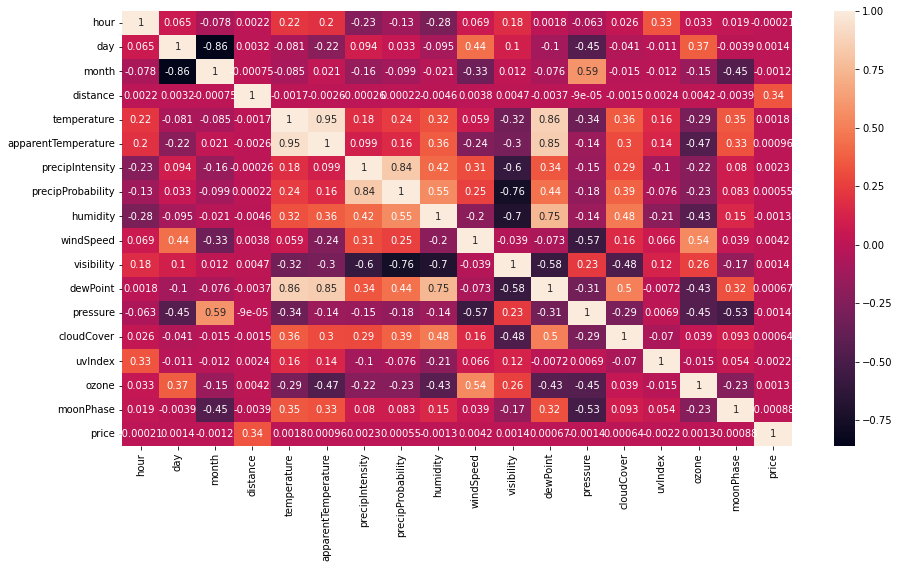

In [19]:
train_data = pd.concat([X_train, y_train], axis=1)
# melihat korelasi data numerik dengan variabel target
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True)

Semua variabel fitur tidak memiliki korelasi terhadap variabel target, kecuali kolom 'distance'. Bahkan, nilai korelasi antara variabel fitur dan target sangat rendah. Hanya kolom 'distance' yang memiliki nilai korelasi di atas 0,005 yaitu 0,34. Meskipun, korelasi kolom 'distance' dan variabel target tergolong rendah, kolom 'distance' tetap masuk dalam model. Selain kolom 'distance', variabel fitur numerik lain akan disingkirkan.

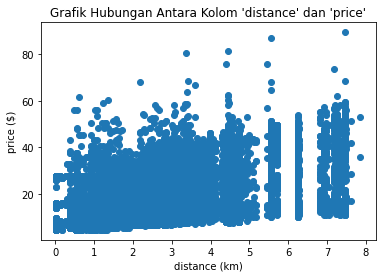

In [20]:
# grafik antara 'distance' dan 'price'
plt.scatter(x=X_train['distance'], y=y_train)
plt.xlabel("distance (km)")
plt.ylabel("price ($)")
plt.title("Grafik Hubungan Antara Kolom 'distance' dan 'price'")
plt.show()

#### Fitur Selain Numerik

Variabel fitur selain numerik hanya kolom 'name' dan 'short_summary'. Untuk menghitung korelasi antara kedua kolom tersebut dan variabel target, hal perlu dilakukan adalah menerapakan one hot encoding pada kolom tersebut.

In [21]:
# menerapkan one hot encoding pada kolom kategorik
ohe = pd.get_dummies(X_train['short_summary'])
name = pd.get_dummies(X_train['name'])
cat_corr = pd.concat([ohe, name, y_train], axis=1)

<AxesSubplot:>

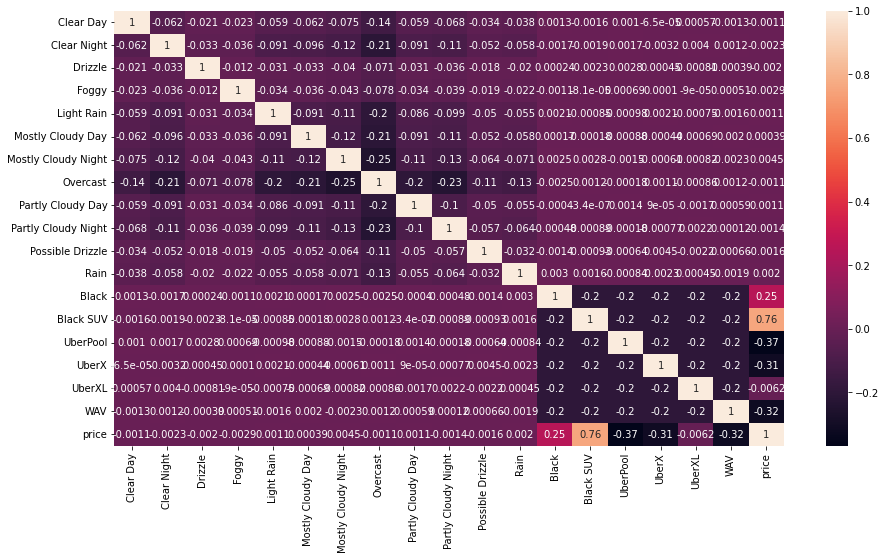

In [22]:
# melihat korelasi data selain numerik dengan variabel target
plt.figure(figsize = (15,8))
sns.heatmap(cat_corr.corr(), annot=True)

Nilai korelasi tinggi terlihat pada kolom 'name'. Bahkan korelasi 'Black SUV' terhadap variabel target mendekati nilai 1. Namun, nilai korelasi 'UberXL' sangat rendah. Meskipun itu, kolom 'name' tetap akan diambil seluruhnya.

#### Seleksi Kolom Fitur Berdasarkan Korelasi dengan Kolom Target

In [23]:
# seleksi kolom yang memiliki korelasi terhadap kolom target
def select_corr_columns(df):
    df = df[['distance', 'name']]
    return df

In [24]:
print('Jumlah kolom sebelum diseleksi:', len(X_train.columns))
X_train = select_corr_columns(X_train)
print('Jumlah kolom setelah diseleksi:', len(X_train.columns))

Jumlah kolom sebelum diseleksi: 19
Jumlah kolom setelah diseleksi: 2


## Pra-pemrosesan Data

### One Hot Encoding

In [25]:
def one_hot_enc(df):
    name = pd.get_dummies(df['name'])
    df = pd.concat([df['distance'], name], axis=1)
    return df

In [26]:
print('Jumlah kolom sebelum dilakukan one hot encoding:', len(X_train.columns))
X_train = one_hot_enc(X_train)
print('Jumlah kolom setelah dilakukan one hot encoding:', len(X_train.columns))
X_train.head()

Jumlah kolom sebelum dilakukan one hot encoding: 2
Jumlah kolom setelah dilakukan one hot encoding: 7


,distance,Black,Black SUV,UberPool,UberX,UberXL,WAV
460127,3.37,0,0,1,0,0,0
612386,3.34,0,0,0,0,0,1
609956,2.32,0,0,1,0,0,0
595745,0.39,0,0,0,0,0,1
215011,1.00,0,0,0,1,0,0


### Pembersihan dan Pra-pemroresan Data _Test_

Semua hal yang dilakukan pada X_train akan diterapkan pada X_test.

In [27]:
# seleksi kolom tahap pertama (menyeleksi yang dibutuhkan)
print('Jumlah kolom sebelum diseleksi:', len(X_test.columns))
X_test = select_columns(X_test)
print('Jumlah kolom setelah diseleksi:', len(X_test.columns))
print()
# penggabungan nilai kolom 'short_summary' dan 'icon'
print(f"Nilai unik kolom 'short_summary' berjumlah {X_test['short_summary'].nunique()} sebelum dimodifikasi:\n{X_test['short_summary'].unique()}")
X_test = combine_columns(X_test)
print(f"Nilai unik kolom 'short_summary' berjumlah {X_test['short_summary'].nunique()} setelah dimodifikasi:\n{X_test['short_summary'].unique()}")
print()
# seleksi kolom tahap kedua (menyeleksi sesuai korelasi)
print('Jumlah kolom sebelum diseleksi:', len(X_test.columns))
X_test = select_corr_columns(X_test)
print('Jumlah kolom setelah diseleksi:', len(X_test.columns))
print()
# one hot encoding
print('Jumlah kolom sebelum dilakukan one hot encoding:', len(X_test.columns))
X_test = one_hot_enc(X_test)
print('Jumlah kolom setelah dilakukan one hot encoding:', len(X_test.columns))
print()
X_test.head()

Jumlah kolom sebelum diseleksi: 56
Jumlah kolom setelah diseleksi: 20

Nilai unik kolom 'short_summary' berjumlah 9 sebelum dimodifikasi:
[' Mostly Cloudy ' ' Overcast ' ' Possible Drizzle ' ' Foggy '
 ' Partly Cloudy ' ' Clear ' ' Light Rain ' ' Rain ' ' Drizzle ']
Nilai unik kolom 'short_summary' berjumlah 12 setelah dimodifikasi:
['Mostly Cloudy Night' 'Overcast' 'Possible Drizzle' 'Mostly Cloudy Day'
 'Foggy' 'Partly Cloudy Day' 'Partly Cloudy Night' 'Clear Day'
 'Light Rain' 'Clear Night' 'Rain' 'Drizzle']

Jumlah kolom sebelum diseleksi: 19
Jumlah kolom setelah diseleksi: 2

Jumlah kolom sebelum dilakukan one hot encoding: 2
Jumlah kolom setelah dilakukan one hot encoding: 7



,distance,Black,Black SUV,UberPool,UberX,UberXL,WAV
296138,2.66,0,0,0,1,0,0
267941,2.73,0,0,1,0,0,0
69260,1.50,0,0,0,1,0,0
60281,3.57,0,0,1,0,0,0
603864,2.48,0,1,0,0,0,0


## Pendefinisian Model

In [28]:
model = LinearRegression()

## Pelatihan Model

In [29]:
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

## Evaluasi Model

In [30]:
print("Nilai R2 data train:", r2_score(y_train, y_train_predict))
print("Nilai R2 data test:", r2_score(y_test, y_test_predict))

Nilai R2 data train: 0.9194271831700096
Nilai R2 data test: 0.9206307401796238


In [31]:
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 5.789272391647777
RMSE: 2.406090686497036


Nilai R2 berada di sekitar 92%. Hal ini menunjukkan kinerja model sudah baik.

## Model Inferensi

Pada bagian ini, model akan dicoba dengan data yang dibuat sendiri. Model hanya menggunakan dua fitur, maka data buatan juga hanya terdiri dua fitur. Data buatan berisi sebagai berikut.
- Jarak 2 km menggunakan servis Black SUV.
- Jarak 3.5 km menggunakan servis UberX.
- Jarak 3 km menggunakan servis UberXL.

In [50]:
# membuat data buatan
predict = [
    [2, 0, 1, 0, 0, 0, 0],
    [3.5, 0, 0, 0, 1, 0, 0],
    [3, 0, 0, 0, 0, 1, 0]
    ]
predict = pd.DataFrame(predict, columns=X_train.columns)
predict.head()

,distance,Black,Black SUV,UberPool,UberX,UberXL,WAV
0,2.0,0,1,0,0,0,0
1,3.5,0,0,0,1,0,0
2,3.0,0,0,0,0,1,0


In [51]:
# memprediksi data buatan
price = model.predict(predict)
predict['price'] = price
predict.head()

,distance,Black,Black SUV,UberPool,UberX,UberXL,WAV,price
0,2.0,0,1,0,0,0,0,29.823212
1,3.5,0,0,0,1,0,0,12.959671
2,3.0,0,0,0,0,1,0,17.659103


Berdasarkan prediksi dari model yang telah dibuat, diketahui bahwa
- Biaya yang perlu dibayar dengan jarak 2 km menggunakan servis Black SUV ialah sekitar $29,82.
- Biaya yang perlu dibayar dengan jarak 3.5 km menggunakan servis UberX ialah sekitar $12,96.
- Biaya yang perlu dibayar dengan jarak 3 km menggunakan servis UberXL ialah sekitar $17,66.

## Kesimpulan

Model yang digunakan untuk mempelajari data Uber yang tersedia ialah Regresi Linear. Melalui perhitungan korelasi, jarak (kolom 'distance') dan jenis servis uber (kolom 'name') memiliki pengaruh terhadap penentuan harga (kolom 'price'). Sehingga, model hanya menggunakan kolom 'distance' dan 'name' dalam memprediksi nilai 'price'. Model memiliki nilai koefisien determinasi (R2) 92% yang menunjukkan kinerja model regresi linier sudah baik.